In [ ]:
""" The goal of this project is to assess whether people's bike riding habits and speeds change based 
on invisible air pollution levels. 

This project used THREE data sets:
1. I use the data from Citibike for 2016 
2. and the air pollution levels for NYC from NOAA
3. And the temperature data from NOAA
Data are cleaned, summed or grouped by day, and compared to weather and air pollution to determine if air pollution
has an effect on bike riding, despite being invisible, and what the relative effect is compared to temperature
Lasso analyses is used to help prevent overfitting."""



#Find the plots for the Data Project by searching "plot for data project"F

""" Regressing citibike duration vs. meteorological effects:
    temperature
    pollution
    pressure
    humidity
    
Variables ignored in this demonstration:
    age
    gender
    subscription type (annual vs. weekly vs. one time)
    
Times removed:
    anything longer than 45 minutes, because commuter rides on Citi are meant to be 30 minutes"""

In [106]:
import numpy as np
import pandas as pd
from sklearn import linear_model
import datetime
from sklearn.cross_validation import train_test_split
%matplotlib inline
import matplotlib.pyplot as plt
import scipy as sp
import statsmodels as sm
import seaborn as sns


In [2]:
citidf = pd.read_csv('201603-citibike-tripdata.csv') # testing the data design

In [3]:
citidf.shape

(919921, 15)

In [4]:
citidf.head() #checking the headers for matching. The header format changes between months, so that has to be fixed on import

,tripduration,starttime,stoptime,start station id,start station name,start station latitude,start station longitude,end station id,end station name,end station latitude,end station longitude,bikeid,usertype,birth year,gender
0,1491,3/1/2016 06:52:42,3/1/2016 07:17:33,72,W 52 St & 11 Ave,40.767272,-73.993929,427,Bus Slip & State St,40.701907,-74.013942,23914,Subscriber,1982.0,1
1,1044,3/1/2016 07:05:50,3/1/2016 07:23:15,72,W 52 St & 11 Ave,40.767272,-73.993929,254,W 11 St & 6 Ave,40.735324,-73.998004,23697,Subscriber,1978.0,1
2,714,3/1/2016 07:15:05,3/1/2016 07:26:59,72,W 52 St & 11 Ave,40.767272,-73.993929,493,W 45 St & 6 Ave,40.756800,-73.982912,21447,Subscriber,1960.0,2
3,329,3/1/2016 07:26:04,3/1/2016 07:31:34,72,W 52 St & 11 Ave,40.767272,-73.993929,478,11 Ave & W 41 St,40.760301,-73.998842,22351,Subscriber,1986.0,1
4,1871,3/1/2016 07:31:30,3/1/2016 08:02:41,72,W 52 St & 11 Ave,40.767272,-73.993929,151,Cleveland Pl & Spring St,40.722104,-73.997249,20985,Subscriber,1978.0,1


In [4]:
print('20160'+str(3)+'-citibike-tripdata.csv') # testing to make sure the file name is right

201603-citibike-tripdata.csv


In [5]:
del(citidf)

In [68]:
# testing newone = pd.read_csv('201601-citibike-tripdata.csv')
# newone.head()


In [7]:
dt_format = "%m/%d/%Y %H:%M:%S"
date_string_1 = '03/01/2016 06:52:42'
date_string_2 = '1/1/2017 23:01:00'
dt = datetime.datetime.strptime(date_string_1, dt_format) #testing the functionality before running toe larger code

def formatted_strptime(date_string):
# Creating a function to turn the imports into dates
# dt_format isn't passed in here, but it's inherited from the global context and remembered when you
# call the function later even in another context. this is called a "closure"
    return datetime.datetime.strptime(date_string, dt_format)



citidf = pd.read_csv('201601-citibike-tripdata.csv') #populating a dataframe to build out
newone = citidf
newone.columns = ['tripduration', 'starttime', 'stoptime',
                  'start station id', 'start station name', 'start station latitude',
                  'start station longitude', 'end station id', 'end station name',
                  'end station latitude', 'end station longitude', 'bikeid', 'usertype',
                  'birth year', 'gender']
newone['datetime'] = newone['starttime'].apply(formatted_strptime)
newone['intday'] = newone['datetime'].apply(lambda dt: int(dt.strftime('%m%d')))
for i in range(2,13):
    if i > 9: #this makes sure it can read in the entire year of data by increasing the string length
        newone = pd.read_csv('2016'+str(i)+'-citibike-tripdata.csv')
        newone.columns = ['tripduration', 'starttime', 'stoptime',
                  'start station id', 'start station name', 'start station latitude',
                  'start station longitude', 'end station id', 'end station name',
                  'end station latitude', 'end station longitude', 'bikeid', 'usertype',
                  'birth year', 'gender']
        dt_format = "%Y-%m-%d %H:%M:%S"
        newone['datetime'] = newone['starttime'].apply(formatted_strptime)
        newone['intday'] = newone['datetime'].apply(lambda dt: int(dt.strftime('%m%d')))
    else:
        newone = pd.read_csv('20160'+str(i)+'-citibike-tripdata.csv')
        newone.columns = ['tripduration', 'starttime', 'stoptime',
                  'start station id', 'start station name', 'start station latitude',
                  'start station longitude', 'end station id', 'end station name',
                  'end station latitude', 'end station longitude', 'bikeid', 'usertype',
                  'birth year', 'gender']
        newone['datetime'] = newone['starttime'].apply(formatted_strptime)
        newone['intday'] = newone['datetime'].apply(lambda dt: int(dt.strftime('%m%d')))
    
    citidf = pd.concat([citidf,newone])
    print(citidf.shape) #checking to make sure each was properly pulled in
    print(i)

(1070352, 17)
2
(1990273, 17)
3
(3003422, 17)
4
(4215702, 17)
5
(5676020, 17)
6
(7056130, 17)
7
(8613793, 17)
8
(10262649, 17)
9
(11836521, 17)
10
(13033463, 17)
11
(13845655, 17)
12


In [8]:
citidf.head(30) # checking the import

,tripduration,starttime,stoptime,start station id,start station name,start station latitude,start station longitude,end station id,end station name,end station latitude,end station longitude,bikeid,usertype,birth year,gender,datetime,intday
0,923,1/1/2016 00:00:41,1/1/2016 00:16:04,268,Howard St & Centre St,40.719105,-73.999733,3002,South End Ave & Liberty St,40.711512,-74.015756,22285,Subscriber,1958.0,1,2016-01-01 00:00:41,101
1,379,1/1/2016 00:00:45,1/1/2016 00:07:04,476,E 31 St & 3 Ave,40.743943,-73.979661,498,Broadway & W 32 St,40.748549,-73.988084,17827,Subscriber,1969.0,1,2016-01-01 00:00:45,101
2,589,1/1/2016 00:00:48,1/1/2016 00:10:37,489,10 Ave & W 28 St,40.750664,-74.001768,284,Greenwich Ave & 8 Ave,40.739017,-74.002638,21997,Subscriber,1982.0,2,2016-01-01 00:00:48,101
3,889,1/1/2016 00:01:06,1/1/2016 00:15:56,268,Howard St & Centre St,40.719105,-73.999733,3002,South End Ave & Liberty St,40.711512,-74.015756,22794,Subscriber,1961.0,2,2016-01-01 00:01:06,101
4,1480,1/1/2016 00:01:12,1/1/2016 00:25:52,2006,Central Park S & 6 Ave,40.765909,-73.976342,2006,Central Park S & 6 Ave,40.765909,-73.976342,14562,Subscriber,1952.0,1,2016-01-01 00:01:12,101
5,332,1/1/2016 00:01:19,1/1/2016 00:06:51,3104,Kent Ave & N 7 St,40.720577,-73.961502,389,Broadway & Berry St,40.710446,-73.965251,15788,Subscriber,1984.0,1,2016-01-01 00:01:19,101
6,2321,1/1/2016 00:01:27,1/1/2016 00:40:08,3167,Amsterdam Ave & W 73 St,40.779668,-73.980930,3164,Columbus Ave & W 72 St,40.777057,-73.978985,24183,Subscriber,1963.0,1,2016-01-01 00:01:27,101
7,694,1/1/2016 00:02:18,1/1/2016 00:13:53,268,Howard St & Centre St,40.719105,-73.999733,497,E 17 St & Broadway,40.737050,-73.990093,15747,Subscriber,1996.0,1,2016-01-01 00:02:18,101
8,1376,1/1/2016 00:03:12,1/1/2016 00:26:09,527,E 33 St & 2 Ave,40.744023,-73.976056,259,South St & Whitehall St,40.701221,-74.012342,23933,Subscriber,1963.0,1,2016-01-01 00:03:12,101
9,615,1/1/2016 00:03:43,1/1/2016 00:13:59,432,E 7 St & Avenue A,40.726218,-73.983799,311,Norfolk St & Broome St,40.717227,-73.988021,23993,Subscriber,1971.0,1,2016-01-01 00:03:43,101


In [9]:
citidf[200000:200003] #checking some mid values

,tripduration,starttime,stoptime,start station id,start station name,start station latitude,start station longitude,end station id,end station name,end station latitude,end station longitude,bikeid,usertype,birth year,gender,datetime,intday
200000,418,1/11/2016 08:50:36,1/11/2016 08:57:34,484,W 44 St & 5 Ave,40.755003,-73.980144,444,Broadway & W 24 St,40.742354,-73.989151,15292,Subscriber,1964.0,1,2016-01-11 08:50:36,111
200001,348,1/11/2016 08:50:36,1/11/2016 08:56:25,327,Vesey Pl & River Terrace,40.715338,-74.016584,304,Broadway & Battery Pl,40.704633,-74.013617,15969,Subscriber,1970.0,0,2016-01-11 08:50:36,111
200002,583,1/11/2016 08:50:37,1/11/2016 09:00:21,339,Avenue D & E 12 St,40.725806,-73.974225,297,E 15 St & 3 Ave,40.734232,-73.986923,17538,Subscriber,1981.0,1,2016-01-11 08:50:37,111


In [10]:
testdf = citidf[0:15] #subsetting to do a test of values

In [9]:
"""
def monthstrip(date_string):
    datestring[find("/")-1]
    

testdf['month'] = testdf['starttime'].apply(monthstrip)
"""

'\ndef monthstrip(date_string):\n    datestring[find("/")-1]\n    \n\ntestdf[\'month\'] = testdf[\'starttime\'].apply(monthstrip)\n'

In [11]:
dt_format = "%m/%d/%Y %H:%M:%S"


def formatted_strptime(date_string):
# dt_format isn't passed in here, but it's inherited from the global context and remembered when you
# call the function later even in another context. this is called a "closure"
    return datetime.datetime.strptime(date_string, dt_format)



In [12]:
dt = datetime.datetime.strptime(testdf.iloc[5,1], dt_format) #creating a function to later pass through a lamda

In [13]:
testdf['datetime'] = testdf['starttime'].apply(formatted_strptime)
testdf['month'] = testdf['datetime'].apply(lambda dt: dt.month)
testdf['day'] = testdf['datetime'].apply(lambda dt: dt.day)

C:\Users\Jason Munster\Anaconda2\lib\site-packages\ipykernel\__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':
C:\Users\Jason Munster\Anaconda2\lib\site-packages\ipykernel\__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app
C:\Users\Jason Munster\Anaconda2\lib\site-packages\ipykernel\__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the cav

In [14]:
testdf = citidf[0:15]

In [15]:
testdf['month'] = testdf['datetime'].apply(lambda dt: dt.month)
testdf['day'] = testdf['datetime'].apply(lambda dt: dt.day)

C:\Users\Jason Munster\Anaconda2\lib\site-packages\ipykernel\__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':
C:\Users\Jason Munster\Anaconda2\lib\site-packages\ipykernel\__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


In [16]:
testdf.head() #checking whether the datetime worked. Instead in the future I'd just parse.

,tripduration,starttime,stoptime,start station id,start station name,start station latitude,start station longitude,end station id,end station name,end station latitude,end station longitude,bikeid,usertype,birth year,gender,datetime,intday,month,day
0,923,1/1/2016 00:00:41,1/1/2016 00:16:04,268,Howard St & Centre St,40.719105,-73.999733,3002,South End Ave & Liberty St,40.711512,-74.015756,22285,Subscriber,1958.0,1,2016-01-01 00:00:41,101,1,1
1,379,1/1/2016 00:00:45,1/1/2016 00:07:04,476,E 31 St & 3 Ave,40.743943,-73.979661,498,Broadway & W 32 St,40.748549,-73.988084,17827,Subscriber,1969.0,1,2016-01-01 00:00:45,101,1,1
2,589,1/1/2016 00:00:48,1/1/2016 00:10:37,489,10 Ave & W 28 St,40.750664,-74.001768,284,Greenwich Ave & 8 Ave,40.739017,-74.002638,21997,Subscriber,1982.0,2,2016-01-01 00:00:48,101,1,1
3,889,1/1/2016 00:01:06,1/1/2016 00:15:56,268,Howard St & Centre St,40.719105,-73.999733,3002,South End Ave & Liberty St,40.711512,-74.015756,22794,Subscriber,1961.0,2,2016-01-01 00:01:06,101,1,1
4,1480,1/1/2016 00:01:12,1/1/2016 00:25:52,2006,Central Park S & 6 Ave,40.765909,-73.976342,2006,Central Park S & 6 Ave,40.765909,-73.976342,14562,Subscriber,1952.0,1,2016-01-01 00:01:12,101,1,1


In [18]:
citidf['month'] = citidf['datetime'].apply(lambda dt: dt.month)
citidf['day'] = citidf['datetime'].apply(lambda dt: dt.day)
#applying the test to the entire data set

In [19]:
citidf.head()

,tripduration,starttime,stoptime,start station id,start station name,start station latitude,start station longitude,end station id,end station name,end station latitude,end station longitude,bikeid,usertype,birth year,gender,datetime,intday,month,day
0,923,1/1/2016 00:00:41,1/1/2016 00:16:04,268,Howard St & Centre St,40.719105,-73.999733,3002,South End Ave & Liberty St,40.711512,-74.015756,22285,Subscriber,1958.0,1,2016-01-01 00:00:41,101,1,1
1,379,1/1/2016 00:00:45,1/1/2016 00:07:04,476,E 31 St & 3 Ave,40.743943,-73.979661,498,Broadway & W 32 St,40.748549,-73.988084,17827,Subscriber,1969.0,1,2016-01-01 00:00:45,101,1,1
2,589,1/1/2016 00:00:48,1/1/2016 00:10:37,489,10 Ave & W 28 St,40.750664,-74.001768,284,Greenwich Ave & 8 Ave,40.739017,-74.002638,21997,Subscriber,1982.0,2,2016-01-01 00:00:48,101,1,1
3,889,1/1/2016 00:01:06,1/1/2016 00:15:56,268,Howard St & Centre St,40.719105,-73.999733,3002,South End Ave & Liberty St,40.711512,-74.015756,22794,Subscriber,1961.0,2,2016-01-01 00:01:06,101,1,1
4,1480,1/1/2016 00:01:12,1/1/2016 00:25:52,2006,Central Park S & 6 Ave,40.765909,-73.976342,2006,Central Park S & 6 Ave,40.765909,-73.976342,14562,Subscriber,1952.0,1,2016-01-01 00:01:12,101,1,1


In [89]:
store = pd.HDFStore('store.h5') #saving the data set for future use so it doesn't need to be recreated
store['citidf'] = citidf

C:\Users\Jason Munster\Anaconda2\lib\site-packages\IPython\core\interactiveshell.py:2881: PerformanceWarning: 
your performance may suffer as PyTables will pickle object types that it cannot
map directly to c-types [inferred_type->mixed,key->block3_values] [items->['starttime', 'stoptime', 'start station name', 'end station name', 'usertype']]

  exec(code_obj, self.user_global_ns, self.user_ns)


In [20]:
### Check on the distributions of times in the citidf dataframe before averaging

testdf = citidf[0::5000]

In [21]:
testdf.shape

(2770, 19)

In [94]:
list(testdf.columns.values)

['tripduration',
 'starttime',
 'stoptime',
 'start station id',
 'start station name',
 'start station latitude',
 'start station longitude',
 'end station id',
 'end station name',
 'end station latitude',
 'end station longitude',
 'bikeid',
 'usertype',
 'birth year',
 'gender',
 'datetime',
 'intday',
 'month',
 'day']

In [22]:
testdf=testdf.drop(['starttime',
 'stoptime',
 'start station id',
 'start station name',
 'start station latitude',
 'start station longitude',
 'end station id',
 'end station name',
 'end station latitude',
 'end station longitude',
 'bikeid',
 'usertype',
 'birth year',
 'gender'], axis=1)

In [23]:
testdf.head()

,tripduration,datetime,intday,month,day
0,923,2016-01-01 00:00:41,101,1,1
5000,2563,2016-01-01 13:55:47,101,1,1
10000,382,2016-01-01 20:22:14,101,1,1
15000,52335,2016-01-02 12:18:25,102,1,2
20000,386,2016-01-02 15:50:56,102,1,2


In [ ]:
#we quickly realize that some of the times for bike rentals make no sense, being far longer than the
#1800 seconds that these bikes are meant to be rented for when used for commuting

In [24]:
testdf['dtday'] = testdf['datetime'].apply(lambda dt: str(dt.strftime('%Y-%m-%d')) ) # adding a day of the year in

In [25]:
testdf

,tripduration,datetime,intday,month,day,dtday
0,923,2016-01-01 00:00:41,101,1,1,2016-01-01
5000,2563,2016-01-01 13:55:47,101,1,1,2016-01-01
10000,382,2016-01-01 20:22:14,101,1,1,2016-01-01
15000,52335,2016-01-02 12:18:25,102,1,2,2016-01-02
20000,386,2016-01-02 15:50:56,102,1,2,2016-01-02
25000,1230,2016-01-02 22:07:53,102,1,2,2016-01-02
30000,1155,2016-01-03 12:18:17,103,1,3,2016-01-03
35000,609,2016-01-03 15:41:06,103,1,3,2016-01-03
40000,813,2016-01-03 20:34:58,103,1,3,2016-01-03
45000,2121,2016-01-04 08:33:22,104,1,4,2016-01-04


In [26]:
citidfcut = citidf.drop(['starttime',
 'stoptime',
 'start station id',
 'start station name',
 'start station latitude',
 'start station longitude',
 'end station id',
 'end station name',
 'end station latitude',
 'end station longitude',
 'bikeid',
 'usertype',
 'birth year',
 'gender'], axis=1)

#dropping extra data, since our goal is to compare this data to pollution and temperature

In [27]:
citidfcut.head()

,tripduration,datetime,intday,month,day
0,923,2016-01-01 00:00:41,101,1,1
1,379,2016-01-01 00:00:45,101,1,1
2,589,2016-01-01 00:00:48,101,1,1
3,889,2016-01-01 00:01:06,101,1,1
4,1480,2016-01-01 00:01:12,101,1,1


In [28]:
citidfcut['Local Date'] = citidfcut['datetime'].apply(lambda dt: str(dt.strftime('%Y-%m-%d')) ) 
#this is necessary to add in because Local Date is the index key used for the meteorology data set

In [29]:
citidfcut.head()

,tripduration,datetime,intday,month,day,Local Date
0,923,2016-01-01 00:00:41,101,1,1,2016-01-01
1,379,2016-01-01 00:00:45,101,1,1,2016-01-01
2,589,2016-01-01 00:00:48,101,1,1,2016-01-01
3,889,2016-01-01 00:01:06,101,1,1,2016-01-01
4,1480,2016-01-01 00:01:12,101,1,1,2016-01-01


In [30]:
citidftest = citidfcut[citidfcut['tripduration'] < 1800] 
# if it's out for longer than 30 minutes, it's no longer a commute rental, and it isn't part of our data set 

(array([  563244.,  1497395.,  1825858.,  1709469.,  1432550.,  1162901.,
          942866.,   765106.,   643121.,   546802.,   468316.,   401610.,
          341045.,   286973.,   235984.]),
 array([   61.        ,   176.86666667,   292.73333333,   408.6       ,
          524.46666667,   640.33333333,   756.2       ,   872.06666667,
          987.93333333,  1103.8       ,  1219.66666667,  1335.53333333,
         1451.4       ,  1567.26666667,  1683.13333333,  1799.        ]),
 <a list of 15 Patch objects>)

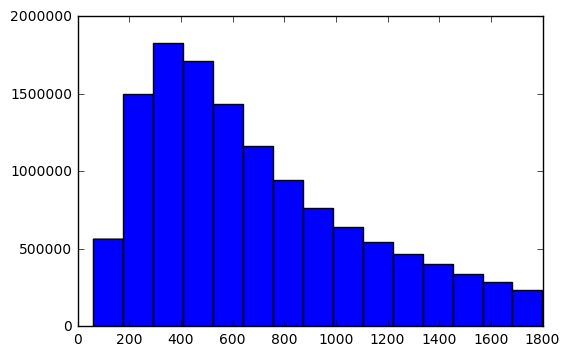

In [31]:
plt.hist(citidftest['tripduration'], bins=15) 
#this is our "good" data. With the crazy outliers eliminated
#the data is roughly normally distributed, albeit with a single fat tail, but it's good enough for regression

In [32]:
# BACKUP - data set is small enough that a backup is warranted to prevent losing work
citidf_backup = citidf.copy(deep=True)
#copy is used to make sure that editing one won't change the other

# Example: do I want to go back and later check vs. gender?

In [33]:
citidf = citidftest

In [165]:
citidf.shape

(12823240, 6)

In [ ]:
=seconds + 60*minutes + 60*60*hours + 60*60*24*days + 60*60*24*7*weeks
# S, M, H, w (weekday, 0 is Sunday), U (week of year) 

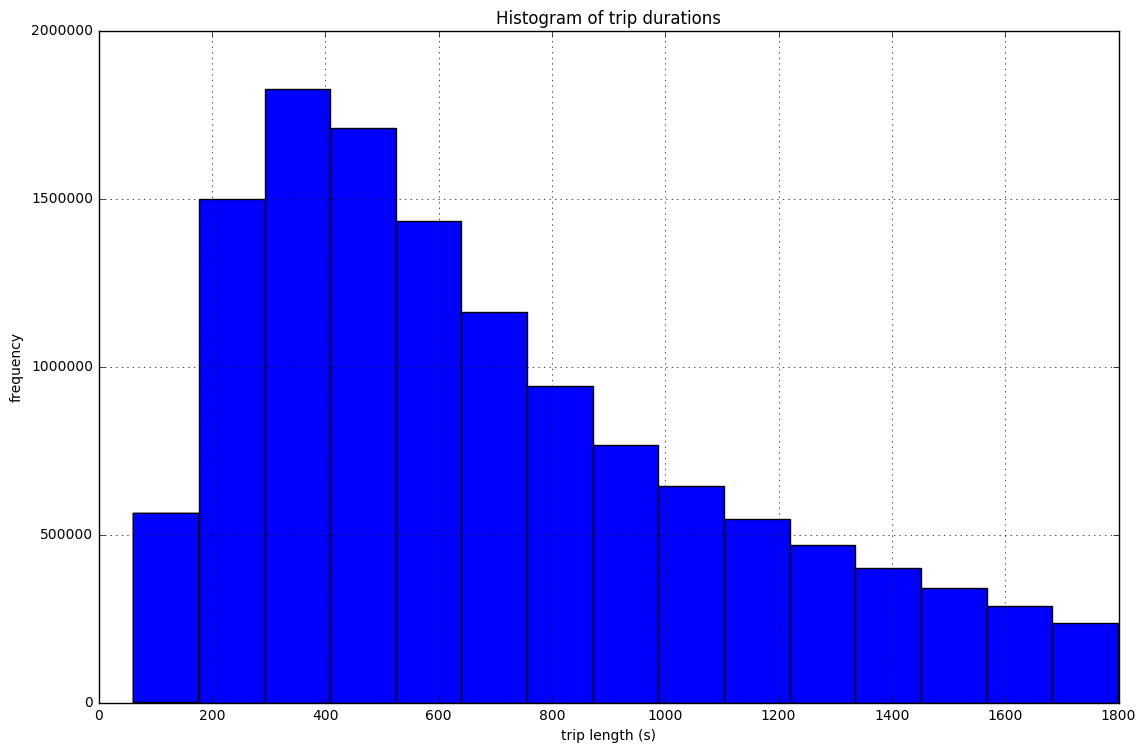

In [34]:
f = plt.figure()

plt.hist(citidf['tripduration'],bins=15)
plt.xlabel('trip length (s)')
plt.ylabel('frequency')
plt.title('Histogram of trip durations')
plt.grid(True)

f.set_size_inches(12, 8)

plt.subplots_adjust(top=0.92, bottom=0.08, left=0.10, right=0.95, hspace=0.25,
                    wspace=0.35)
plt.show()





In [ ]:
# the data shows that most people use the bikes for 10 minute rides, going less than 2 miles. Which makes sense in Manhattan.


In [35]:
citidf=citidf.drop(['intday'], axis=1) # no longer need this

In [36]:
citisumdf = citidf.groupby(['Local Date'], as_index=False).sum()

In [37]:
citisumdf.head() #ignore the summed month and days, we only care about the tripduration

,Local Date,tripduration,month,day
0,2016-01-01,6558462,9959,9959
1,2016-01-02,8524176,13428,26856
2,2016-01-03,8991210,14370,43110
3,2016-01-04,11026573,18940,75760
4,2016-01-05,9775364,17568,87840


In [38]:
citimediandf = citidf.groupby(['Local Date'], as_index=False).median()

In [39]:
citimediandf.head()

,Local Date,tripduration,month,day
0,2016-01-01,536.0,1.0,1.0
1,2016-01-02,520.0,1.0,2.0
2,2016-01-03,510.0,1.0,3.0
3,2016-01-04,494.0,1.0,4.0
4,2016-01-05,473.0,1.0,5.0


In [40]:
citimeandf = citidf.groupby(['Local Date'], as_index = False).mean()

In [41]:
citimeandf.head()

,Local Date,tripduration,month,day
0,2016-01-01,658.546240,1.0,1.0
1,2016-01-02,634.806077,1.0,2.0
2,2016-01-03,625.693111,1.0,3.0
3,2016-01-04,582.184424,1.0,4.0
4,2016-01-05,556.430100,1.0,5.0


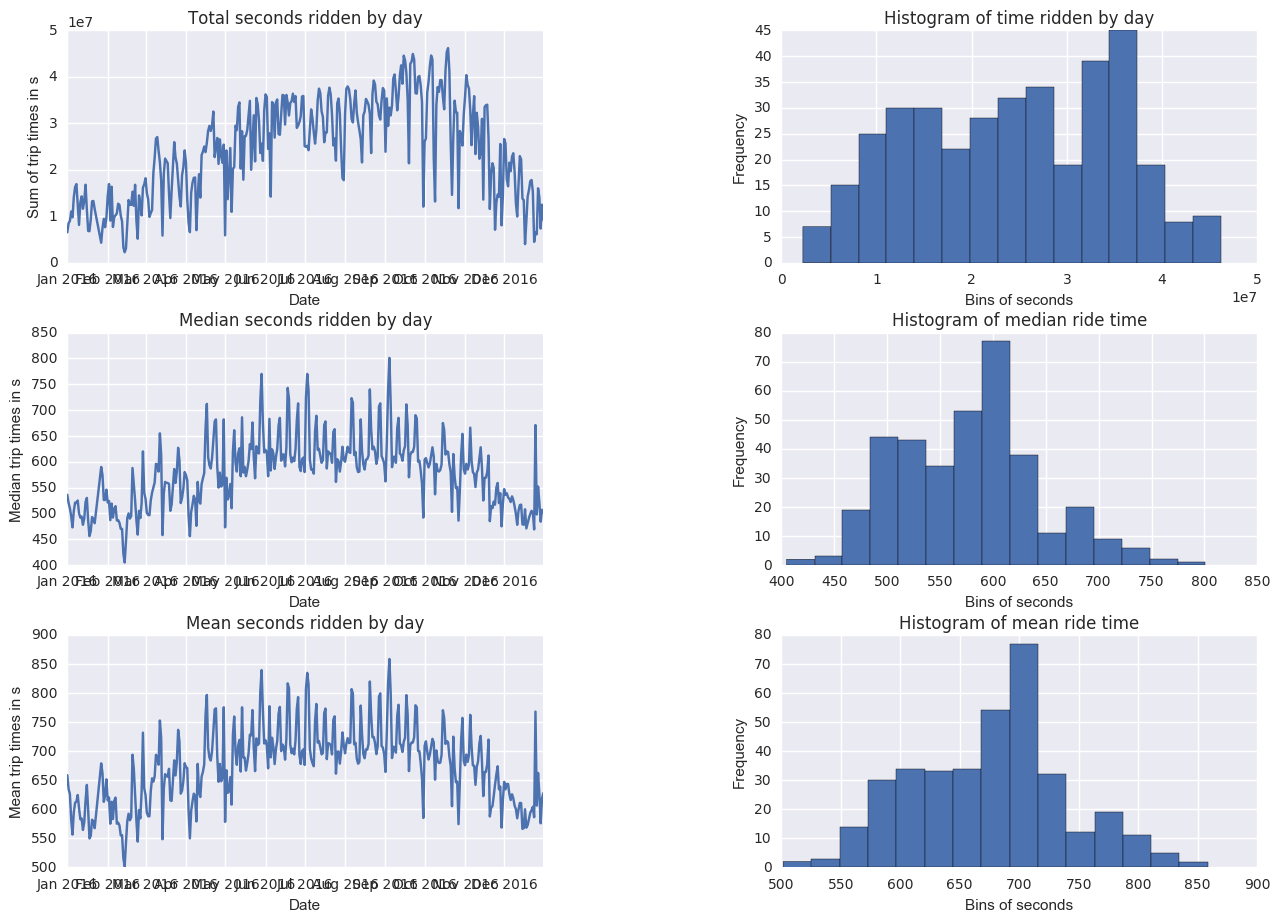

In [107]:
#This is the plot for data project #1

f = plt.figure()

plt.subplot(321)
plt.plot(pd.to_datetime(citisumdf['Local Date']), citisumdf['tripduration'])
plt.xlabel('Date')
plt.ylabel('Sum of trip times in s')
plt.title('Total seconds ridden by day')
plt.grid(True)


plt.subplot(323)
plt.plot(pd.to_datetime(citimediandf['Local Date']), citimediandf['tripduration'])
plt.xlabel('Date')
plt.ylabel('Median trip times in s')
plt.title('Median seconds ridden by day')
plt.grid(True)

plt.subplot(325)
plt.plot(pd.to_datetime(citimeandf['Local Date']), citimeandf['tripduration'])
plt.xlabel('Date')
plt.ylabel('Mean trip times in s')
plt.title('Mean seconds ridden by day')
plt.grid(True)

plt.subplot(322)
plt.hist(citisumdf['tripduration'],bins=15)
plt.xlabel('Bins of seconds')
plt.ylabel('Frequency')
plt.title('Histogram of time ridden by day')
plt.grid(True)

plt.subplot(324)
plt.hist(citimediandf['tripduration'],bins=15)
plt.xlabel('Bins of seconds')
plt.ylabel('Frequency')
plt.title('Histogram of median ride time')
plt.grid(True)

plt.subplot(326)
plt.hist(citimeandf['tripduration'],bins=15)
plt.xlabel('Bins of seconds')
plt.ylabel('Frequency')
plt.title('Histogram of mean ride time')
plt.grid(True)

f.set_size_inches(14, 9)

plt.subplots_adjust(top=.98, bottom=0.05, left=0.10, right=0.95, hspace=0.3,
                    wspace=0.5)
plt.show()

In [338]:
#note that the mean times are skewed by some outliers on longer days. 

In [340]:
# The sum of time ridden per day is closest to normal distribution. 

In [ ]:
# I am going to do the analysis on the total time rode per day, mostly because it would be overboard to do all three for a demo

In [ ]:
### Munging and cleaning done for citibike!

In [ ]:


#### Time to bring in and munge pollution data! ###



In [43]:
aqidf = pd.read_csv('daily_aqi_by_cbsa_2016.csv')

In [44]:
aqidf.head()

,CBSA,CBSA Code,Date,AQI,Category,Defining Parameter,Defining Site,Number of Sites Reporting
0,"Aberdeen, SD",10100,2016-01-01,16,Good,PM2.5,46-013-0003,1
1,"Aberdeen, SD",10100,2016-01-04,31,Good,PM2.5,46-013-0003,1
2,"Aberdeen, SD",10100,2016-01-07,76,Moderate,PM2.5,46-013-0003,1
3,"Aberdeen, SD",10100,2016-01-10,34,Good,PM2.5,46-013-0003,1
4,"Aberdeen, SD",10100,2016-01-13,44,Good,PM2.5,46-013-0003,1


In [45]:
nyc=aqidf['CBSA'] == 'New York-Newark-Jersey City, NY-NJ-PA' #limiting the data set to local data

In [46]:
aqidf[nyc]

,CBSA,CBSA Code,Date,AQI,Category,Defining Parameter,Defining Site,Number of Sites Reporting
107673,"New York-Newark-Jersey City, NY-NJ-PA",35620,2016-01-01,50,Good,PM2.5,36-061-0115,40
107674,"New York-Newark-Jersey City, NY-NJ-PA",35620,2016-01-02,63,Moderate,PM2.5,36-061-0115,35
107675,"New York-Newark-Jersey City, NY-NJ-PA",35620,2016-01-03,73,Moderate,PM2.5,36-061-0115,35
107676,"New York-Newark-Jersey City, NY-NJ-PA",35620,2016-01-04,48,Good,PM2.5,36-061-0115,40
107677,"New York-Newark-Jersey City, NY-NJ-PA",35620,2016-01-05,59,Moderate,PM2.5,36-005-0112,34
107678,"New York-Newark-Jersey City, NY-NJ-PA",35620,2016-01-06,68,Moderate,PM2.5,36-061-0115,35
107679,"New York-Newark-Jersey City, NY-NJ-PA",35620,2016-01-07,96,Moderate,PM2.5,34-017-1003,40
107680,"New York-Newark-Jersey City, NY-NJ-PA",35620,2016-01-08,77,Moderate,PM2.5,36-061-0128,35
107681,"New York-Newark-Jersey City, NY-NJ-PA",35620,2016-01-09,63,Moderate,PM2.5,36-061-0128,36
107682,"New York-Newark-Jersey City, NY-NJ-PA",35620,2016-01-10,39,Good,PM2.5,36-061-0115,41


In [47]:
nyaqidf=aqidf[nyc]
nyaqidf=nyaqidf.drop(['CBSA',
 'CBSA Code', 'Category', 'Defining Parameter', 'Defining Site', 'Number of Sites Reporting'], axis=1)
nyaqidf=nyaqidf.rename(columns = {'Date':'Local Date'})

In [48]:
tempdf = pd.read_csv('daily_TEMP_2016.csv')




In [49]:
tempdf.head()

,State Code,County Code,Site Num,Parameter Code,POC,Latitude,Longitude,Datum,Parameter Name,Sample Duration,...,AQI,Method Code,Method Name,Local Site Name,Address,State Name,County Name,City Name,CBSA Name,Date of Last Change
0,1,73,23,62101,1,33.553056,-86.815,WGS84,Outdoor Temperature,1 HOUR,...,NaN,61,Instrumental - Met One 083D,North Birmingham,"NO. B'HAM,SOU R.R., 3009 28TH ST. NO.",Alabama,Jefferson,Birmingham,"Birmingham-Hoover, AL",2017-03-22
1,1,73,23,62101,1,33.553056,-86.815,WGS84,Outdoor Temperature,1 HOUR,...,NaN,61,Instrumental - Met One 083D,North Birmingham,"NO. B'HAM,SOU R.R., 3009 28TH ST. NO.",Alabama,Jefferson,Birmingham,"Birmingham-Hoover, AL",2017-03-22
2,1,73,23,62101,1,33.553056,-86.815,WGS84,Outdoor Temperature,1 HOUR,...,NaN,61,Instrumental - Met One 083D,North Birmingham,"NO. B'HAM,SOU R.R., 3009 28TH ST. NO.",Alabama,Jefferson,Birmingham,"Birmingham-Hoover, AL",2017-03-22
3,1,73,23,62101,1,33.553056,-86.815,WGS84,Outdoor Temperature,1 HOUR,...,NaN,61,Instrumental - Met One 083D,North Birmingham,"NO. B'HAM,SOU R.R., 3009 28TH ST. NO.",Alabama,Jefferson,Birmingham,"Birmingham-Hoover, AL",2017-03-22
4,1,73,23,62101,1,33.553056,-86.815,WGS84,Outdoor Temperature,1 HOUR,...,NaN,61,Instrumental - Met One 083D,North Birmingham,"NO. B'HAM,SOU R.R., 3009 28TH ST. NO.",Alabama,Jefferson,Birmingham,"Birmingham-Hoover, AL",2017-03-22


In [50]:
#making sure we look at only one city. We use the bronx because it is the closest meteorological station to Manhattan
tempcity=tempdf['City Name'] == "New York"
tempcounty=tempdf['County Name'] == "Bronx"
nyctempdf = tempdf[tempcity & tempcounty]
# look at Arithmetic Mean and 1st Max Value columns

nyctempdf=nyctempdf.drop(['State Code', 'County Code', 'Site Num', 'Parameter Code', 'POC', 'Latitude',
 'Longitude', 'Datum', 'Parameter Name', 'Sample Duration', 'Pollutant Standard', 'Units of Measure',
 'Event Type', 'Observation Count', 'Observation Percent', '1st Max Hour', 'AQI', 'Method Code',
 'Method Name', 'Local Site Name', 'Address', 'State Name', 'County Name', 'City Name', 'CBSA Name',
 'Date of Last Change'], axis=1)

nyctempdf=nyctempdf.rename(columns = {'Arithmetic Mean' : 'Temp Mean', '1st Max Value':'Max Temp', "Date Local":"Local Date"})


In [51]:
pressdf = pd.read_csv('daily_PRESS_2016.csv') #air pressure info. Says whether or not it is raining heavily.
presscity=pressdf['City Name'] == "New York"
presscounty=pressdf['County Name'] == "Bronx"
presssite=pressdf['Local Site Name'] == "IS 52" #found out the length was wrong --> 2 sites --> eliminate one
nycpressdf=pressdf[presscity & presscounty & presssite] 

nycpressdf=nycpressdf.drop(['State Code', 'County Code', 'Site Num', 'Parameter Code', 'POC', 'Latitude',
 'Longitude', 'Datum', 'Parameter Name', 'Sample Duration', 'Pollutant Standard', 'Units of Measure',
 'Event Type', 'Observation Count', 'Observation Percent', '1st Max Hour', 'AQI', 'Method Code',
 'Method Name', 'Local Site Name', 'Address', 'State Name', 'County Name', 'City Name', 'CBSA Name',
 'Date of Last Change'], axis=1)

nycpressdf=nycpressdf.rename(columns = {'Arithmetic Mean' : 'Pressure Mean', '1st Max Value':'Pressure Max', "Date Local":"Local Date"})

In [52]:
### NOTE: NO DATA FOR BRONX, LOOKING AT BAYONNE SOUTH OF JERSEY CITY WHICH WILL HAVE MORE OCEAN EFFECTS
rhdf = pd.read_csv('daily_RH_DP_2016.csv')
rhcity = rhdf['City Name'] == "Bayonne"
rhcounty = rhdf['County Name'] == "Hudson"
nycrhdf = rhdf[rhcity & rhcounty]

nycrhdf=nycrhdf.drop(['State Code', 'County Code', 'Site Num', 'Parameter Code', 'POC', 'Latitude', 'Longitude', 'Datum', 'Parameter Name',
 'Sample Duration', 'Pollutant Standard', 'Units of Measure', 'Event Type', 'Observation Count', 'Observation Percent',
 '1st Max Hour', 'AQI', 'Method Code', 'Method Name', 'Local Site Name', 'Address', 'State Name', 'County Name', 'City Name', 'CBSA Name',
 'Date of Last Change'], axis=1)

nycrhdf=nycrhdf.rename(columns = {'Arithmetic Mean':'RH Mean', '1st Max Value':'RH Max', "Date Local":"Local Date"})




In [175]:
#### Cleanings done: It turned out that there was no relative humidty data for March and April in the Bronx
###  so I had to take one from Jersey City instead

### In addition, I had to subset the pressure readings, since there we two sets confounding the data

In [53]:
nyaqidf.head()

,Local Date,AQI
107673,2016-01-01,50
107674,2016-01-02,63
107675,2016-01-03,73
107676,2016-01-04,48
107677,2016-01-05,59


In [54]:
nycrhdf

,Local Date,RH Mean,RH Max
100396,2016-01-01,57.158333,61.7
100397,2016-01-02,51.758333,58.1
100398,2016-01-03,55.987500,67.0
100399,2016-01-04,51.608333,65.4
100400,2016-01-05,42.837500,61.8
100401,2016-01-06,39.525000,58.9
100402,2016-01-07,42.612500,57.4
100403,2016-01-08,59.508333,68.7
100404,2016-01-09,76.575000,85.4
100405,2016-01-10,74.933333,88.8


In [55]:
nyaqidf.shape

(366, 2)

In [56]:
nycpressdf.head()

,Local Date,Pressure Mean,Pressure Max
70947,2016-01-01,1013.458333,1015.0
70948,2016-01-02,1013.333333,1016.0
70949,2016-01-03,1007.458333,1011.0
70950,2016-01-04,1014.333333,1024.0
70951,2016-01-05,1030.833333,1033.0


In [57]:
pd.merge(nyaqidf, nycpressdf, how='inner', on = 'Local Date') #merging the pollution and other data

,Local Date,AQI,Pressure Mean,Pressure Max
0,2016-01-01,50,1013.458333,1015.0
1,2016-01-02,63,1013.333333,1016.0
2,2016-01-03,73,1007.458333,1011.0
3,2016-01-04,48,1014.333333,1024.0
4,2016-01-05,59,1030.833333,1033.0
5,2016-01-06,68,1029.250000,1032.0
6,2016-01-07,96,1022.166667,1025.0
7,2016-01-08,77,1018.958333,1020.0
8,2016-01-09,63,1017.833333,1020.0
9,2016-01-10,39,998.416667,1014.0


In [58]:
#the following lines merge all the data sets together
metdf = pd.merge(nyaqidf, nycpressdf, how='inner', on = 'Local Date')
metdf.shape

(366, 4)

In [59]:
metdf = pd.merge(metdf, nyctempdf, how='inner', on = 'Local Date')

In [60]:
metdf = pd.merge(metdf, nycrhdf, how='inner', on = 'Local Date')

In [61]:
metdf.shape

(366, 8)

In [37]:
"""
Variables we now have to manipulate:

    nycrhdf
    nycpressdf
    nyctempdf
    nyaqidf
    citidf

"""



'\nVariables we now have to manipulate:\n\n    nycrhdf\n    nycpressdf\n    nyctempdf\n    nyaqidf\n    citidf\n\n'

In [62]:
metdf.head() #looking at the combined data

,Local Date,AQI,Pressure Mean,Pressure Max,Temp Mean,Max Temp,RH Mean,RH Max
0,2016-01-01,50,1013.458333,1015.0,38.958333,42.0,57.158333,61.7
1,2016-01-02,63,1013.333333,1016.0,35.666667,39.0,51.758333,58.1
2,2016-01-03,73,1007.458333,1011.0,39.166667,45.0,55.987500,67.0
3,2016-01-04,48,1014.333333,1024.0,26.375000,36.0,51.608333,65.4
4,2016-01-05,59,1030.833333,1033.0,19.125000,28.0,42.837500,61.8


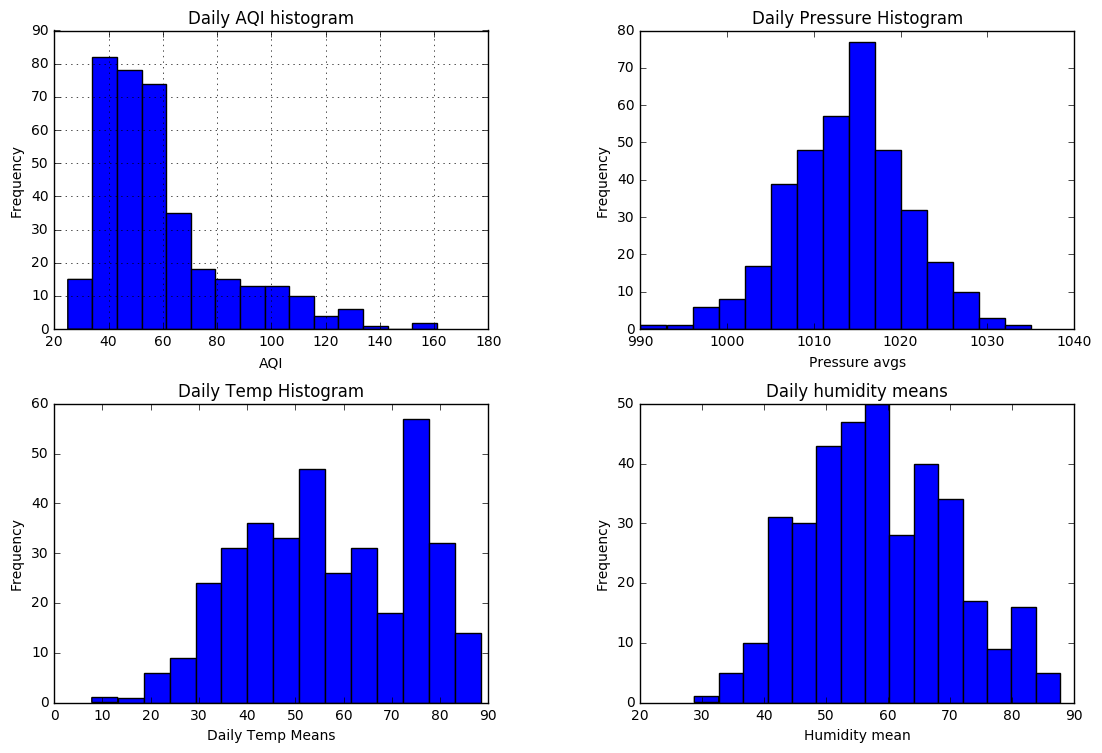

In [63]:
f = plt.figure()

plt.subplot(221)
plt.hist(metdf['AQI'],bins=15)
plt.xlabel('AQI')
plt.ylabel('Frequency')
plt.title('Daily AQI histogram')
plt.grid(True)


plt.subplot(222)
plt.hist(metdf['Pressure Mean'],bins=15)
plt.xlabel('Pressure avgs')
plt.ylabel('Frequency')
plt.title('Daily Pressure Histogram')

plt.subplot(223)
plt.hist(metdf['Temp Mean'], bins=15)
plt.xlabel('Daily Temp Means')
plt.ylabel('Frequency')
plt.title('Daily Temp Histogram')

plt.subplot(224)
plt.hist(metdf['RH Mean'], bins=15)
plt.xlabel('Humidity mean')
plt.ylabel('Frequency')
plt.title('Daily humidity means')

f.set_size_inches(12, 8)

plt.subplots_adjust(top=0.92, bottom=0.08, left=0.10, right=0.95, hspace=0.25,
                    wspace=0.35)
plt.show()



In [ ]:
### We don't see anything weird here. Daily AQI should have a few really polluted days during inversions. 
### Pressure and humidity are within bounds
### Temperature is not exactly normal, but it is close enough

In [ ]:
### Now lets look at the time series!

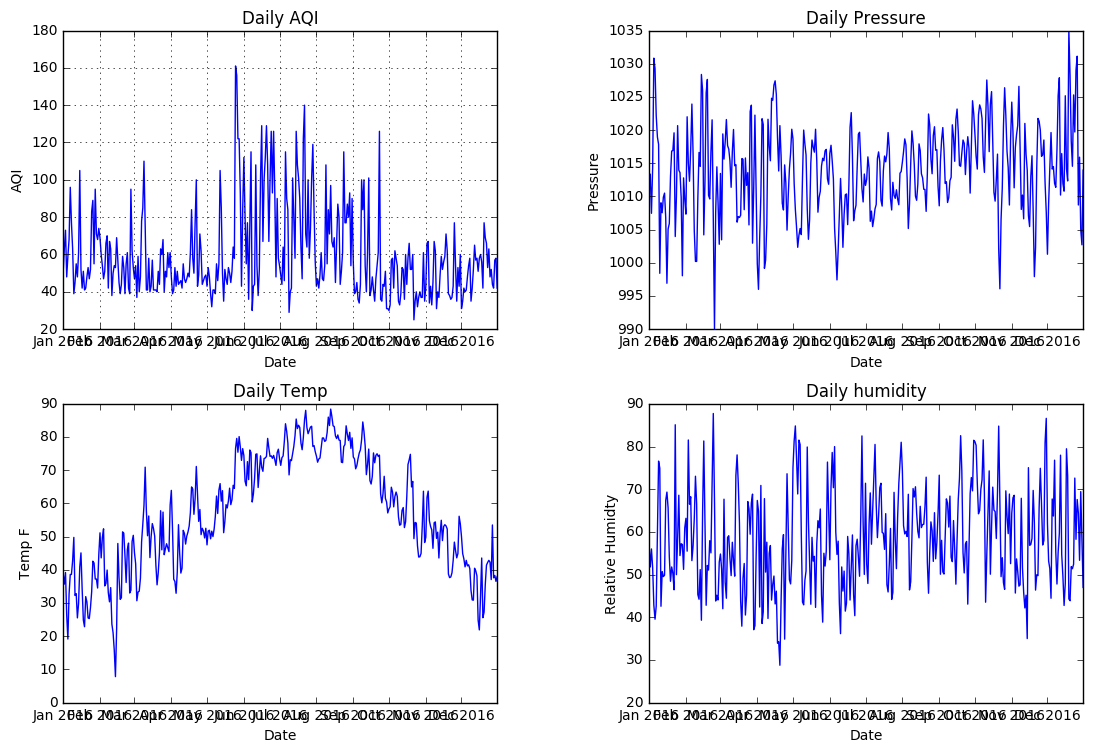

In [64]:
f = plt.figure()

plt.subplot(221)
plt.plot(pd.to_datetime(metdf['Local Date']), metdf['AQI'])
plt.xlabel('Date')
plt.ylabel('AQI')
plt.title('Daily AQI')
plt.grid(True)


plt.subplot(222)
plt.plot(pd.to_datetime(metdf['Local Date']), metdf['Pressure Mean'])
plt.xlabel('Date')
plt.ylabel('Pressure')
plt.title('Daily Pressure')

plt.subplot(223)
plt.plot(pd.to_datetime(metdf['Local Date']), metdf['Temp Mean'])
plt.xlabel('Date')
plt.ylabel('Temp F')
plt.title('Daily Temp')

plt.subplot(224)
plt.plot(pd.to_datetime(metdf['Local Date']), metdf['RH Mean'])
plt.xlabel('Date')
plt.ylabel('Relative Humidty')
plt.title('Daily humidity')

f.set_size_inches(12, 8)

plt.subplots_adjust(top=0.92, bottom=0.08, left=0.10, right=0.95, hspace=0.25,
                    wspace=0.35)
plt.show()

In [ ]:
### Nothing really surprising here, doesn't look like any outliers to try to get rid of. 


### In retrospect, there is an apparent correlation between temp and AQI?

In [65]:
np.corrcoef(metdf['AQI'],metdf['Temp Mean'])

array([[ 1.        ,  0.42579942],
       [ 0.42579942,  1.        ]])

In [ ]:
### Looks like the correlation is .4, which we need to keep in mind if air pollution and temp
### have the same directional effect on bike use.

In [66]:
metcitisumdf=pd.merge(citisumdf,metdf, how = 'inner', on = 'Local Date') #combine them all together!

In [67]:
metcitisumdf.head()

,Local Date,tripduration,month,day,AQI,Pressure Mean,Pressure Max,Temp Mean,Max Temp,RH Mean,RH Max
0,2016-01-01,6558462,9959,9959,50,1013.458333,1015.0,38.958333,42.0,57.158333,61.7
1,2016-01-02,8524176,13428,26856,63,1013.333333,1016.0,35.666667,39.0,51.758333,58.1
2,2016-01-03,8991210,14370,43110,73,1007.458333,1011.0,39.166667,45.0,55.987500,67.0
3,2016-01-04,11026573,18940,75760,48,1014.333333,1024.0,26.375000,36.0,51.608333,65.4
4,2016-01-05,9775364,17568,87840,59,1030.833333,1033.0,19.125000,28.0,42.837500,61.8


In [68]:
metcitisumdf['tripduration']=metcitisumdf['tripduration']/1000000 #make the sum more rational

In [69]:
metcitisumdf.head()

,Local Date,tripduration,month,day,AQI,Pressure Mean,Pressure Max,Temp Mean,Max Temp,RH Mean,RH Max
0,2016-01-01,6.558462,9959,9959,50,1013.458333,1015.0,38.958333,42.0,57.158333,61.7
1,2016-01-02,8.524176,13428,26856,63,1013.333333,1016.0,35.666667,39.0,51.758333,58.1
2,2016-01-03,8.991210,14370,43110,73,1007.458333,1011.0,39.166667,45.0,55.987500,67.0
3,2016-01-04,11.026573,18940,75760,48,1014.333333,1024.0,26.375000,36.0,51.608333,65.4
4,2016-01-05,9.775364,17568,87840,59,1030.833333,1033.0,19.125000,28.0,42.837500,61.8


In [ ]:
## Now we begin the final part: CROSS-VALIDATED FITTING

In [123]:
model_ridge_cv = linear_model.RidgeCV(alphas=[0.1, 1.0, 2.0, 4.0, 6.0, 8.0, 10.0, 12, 15, 20, 30, 40, 50])
model_lasso_cv = linear_model.LassoCV(alphas=[.0000001, .00001, .001, .01, 0.1, 1.0, 2.0, 4.0, 6.0, 8.0, 10.0, 12, 15, 20, 30, 40, 50, 60, 70, 80, 90, 100, 120, 140, 160])
model_en_cv = linear_model.ElasticNetCV(l1_ratio=[.9], n_alphas=100)

In [71]:
cititarget = metcitisumdf['tripduration']

In [108]:
#We drop data that is highly related, like multiple temperatures. Pressure and RH are similar, as both signify rain.
citidata = metcitisumdf.drop(['Local Date','tripduration','month','day','Pressure Max','Pressure Mean','RH Max','Max Temp'], axis=1)

In [110]:
#We z-normalize the data in order to compare relative effects after CV regression
from scipy.stats import zscore
citiz = citidata.apply(zscore)

In [111]:
citiz.head() #The day has changed, but we don't care at this point. All we need is the other.

,AQI,Temp Mean,RH Mean
0,-0.410133,-1.057120,-0.105940
1,0.140063,-1.249922,-0.574124
2,0.563290,-1.044918,-0.207452
3,-0.494779,-1.794159,-0.587129
4,-0.029228,-2.218811,-1.347567


In [124]:
X_train, X_test, y_train, y_test = train_test_split(citiz, cititarget, test_size=0.3, random_state=0)

In [125]:
X_train.shape, y_train.shape

((253, 3), (253L,))

In [126]:
model_ridge_cv.fit(X_train, y_train)
model_ridge_cv.alpha_

1.0

In [127]:
model_lasso_cv.fit(X_train, y_train)
model_lasso_cv.alpha_

9.9999999999999995e-08

In [128]:
model_lasso = linear_model.Lasso(alpha = .00001)

In [129]:
model_lasso.fit(X_train, y_train)

Lasso(alpha=1e-07, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False)

In [130]:
print(model_lasso.coef_)

[-1.61002985  9.07172658 -2.77739047]


In [438]:
# It's pretty clear that pollution is a fairly powerful motivator. Which is pretty amazing, considering that you cannot see it. 

In [ ]:
# z normalize: subtract mean and divide by standard deviation

In [119]:
def nonzero_lasso(clf, lcols):
    featuremask=(clf.coef_ !=0.0)
    return pd.DataFrame(dict(feature=lcols, coef=clf.coef_, abscoef=np.abs(clf.coef_)))[featuremask].sort('abscoef', ascending=False)

In [120]:
list(citidata.columns)

['AQI', 'Temp Mean', 'RH Mean']

In [121]:
model_lasso.coef_

array([-1.61001014,  9.071706  , -2.77737704])

In [122]:
lasso_importances=nonzero_lasso(model_lasso, list(citidata.columns))
lasso_importances.set_index("feature", inplace=True)
lasso_importances.head(10)

C:\Users\Jason Munster\Anaconda2\lib\site-packages\ipykernel\__main__.py:3: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
  app.launch_new_instance()


,abscoef,coef
feature,,
Temp Mean,9.071706,9.071706
RH Mean,2.777377,-2.777377
AQI,1.610010,-1.610010


In [ ]:
## This is the second plot for the data project, and the important one.
"""
This would be the final result for the project. The results are staggering.
SUMMARY:
1. Warmer temperatures mean people ride more. No surprise here.
2. Relative humidity, IE rain at high humidities, means people ride less. 
This is a little less than 1/3 as important as temperature
3. The most interesting result is AQI. AQI reduced the amount people ride.
Pollution is not visible, you cannot easily feel it like temperature and it doesn't produce rain or sweat like high RH.
You can't even see the pollution levels, yet people ride significantly less during higher pollution.
This likely has important results for productivity across many jobs

IMPORTANT QUALIFICATION
We saw a positive .4 correlation between air pollution and API. We

USE OF THESE RESULTS
1. People likely travel locally less during high pollution. On days with higher projected pollution, businesses
should expect lower visitations
2. Productivity may be lower during high pollution days. Most buildings don't effectively filter pollution.
There may be a business case for pollution filtration in offices to increase productivity.
In other words, productivity boost may increase bottom line more than filtration decreases it